In [ ]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='final++.csv' #load the final dataset with all features for building NN
df = pd.read_csv(file)
print(df.describe()) #statistics

         Unnamed: 0  totaltraveltimeinhours  ...  earnings_gross  delay_probability
count  85153.000000            85153.000000  ...    85153.000000       85153.000000
mean   42576.000000                4.272064  ...      115.954804           0.697344
std    24581.698073                2.947939  ...       94.155971           0.150572
min        0.000000                0.120000  ...        2.930000           0.400000
25%    21288.000000                2.320000  ...       59.140000           0.600000
50%    42576.000000                3.740000  ...       94.830000           0.600000
75%    63864.000000                5.440000  ...      142.240000           0.880000
max    85152.000000               25.000000  ...     1121.310000           0.928000

[8 rows x 20 columns]


In [ ]:
# drop redundant column via reading
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,distance,travelfrom,travelto,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,10.305,big_city,big_city,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,10.305,big_city,big_city,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,10.305,big_city,big_city,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,10.305,big_city,big_city,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,10.305,big_city,big_city,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,463.689,big_city,big_city,126954,209566,low,0,11,437,5,6,85,96,achieved,1026,1030,142.97,0.6
85149,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,463.689,big_city,big_city,126954,209566,low,0,11,518,5,6,85,96,achieved,1026,1030,187.21,0.6
85150,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,463.689,big_city,big_city,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8
85151,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,463.689,big_city,big_city,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8


Why do we need NN? Define Target column Y for predictions

Currently we start with the dataset that has 29 features (including generated and aligned ones from other incorporated datasets).

Would like to predict by NN what transport modes would be simultaneously involved in a trip path for the traveller (how many) to help him to decide in advance would it be comfortable or not (e.g with respect to safety - covid19, risk of usage a special transport type) to even start a trip

We do not need all unique&specific combinations, specifing the order of how many trains did we use per trip here, we just need to know that for that path we used a train or a car (or the combination of them for the customer)=> how many modes (labels) would be involved in journey

For this reason, we will adapt the column with labels

In [ ]:
#investigate all unique values
for c in df:
    print(df[c].unique())
    print(df[c].nunique())

[ 0.39  0.13  0.25 ... 14.08  8.65 16.2 ]
1099
[  0.86   2.17   2.89 ... 106.46 108.45 109.46]
3219
[0 1 2 3 7 4 5]
7
[0.    0.3   0.383 0.273 0.632 0.499 0.437 0.311 0.257 0.617 0.476 0.479
 0.173 0.224 0.095 0.364 0.366 0.374 0.572 0.452 0.317 0.253 0.526 0.416
 0.178 0.477 0.438 0.191 0.378 0.181 0.455 0.428 0.432 0.562 0.466 0.182
 0.353 0.243 0.177 0.141 0.142 0.279 0.151 0.379 0.415 0.305 0.384 0.321
 0.104 0.284 0.67  0.096 0.498 0.261 0.36  0.039 0.771 0.536 0.113 0.506
 0.42  0.138 0.548 0.123 0.206 0.105 0.282 0.307 0.156 0.108 0.131 0.176
 0.201 0.441 0.263 0.409 0.576 0.755 0.31  0.084 0.165 0.06  0.965 0.523
 0.446 0.354 0.118 0.043 0.287 0.314 0.093 0.129 0.149 0.626 0.587 0.634
 0.493 0.573 0.439 0.246 0.333 0.931 0.648 0.425 0.507 0.023 0.335 0.196
 0.254 0.248 0.231 0.841 0.514 0.593 0.033 0.232 0.515 0.495 0.05  0.445
 0.659 0.213 0.412 0.107 0.482 0.543 0.34  0.424 0.45  0.072 0.408 0.421
 0.294 0.365 0.326 0.329 0.401 0.11  0.591 0.391 0.511 0.527 0.436 0.387
 0.245

The initial broadness of ranges was preserved in the source dataset

In [ ]:
dff=df.copy()#take a copy

Initially, we have 33 unique values in the column "finalsolutionusedlabels"(all the range)-we will trasnsform the values, for this reason we make a copy of df

In [ ]:
#replace the values

dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[db_fv, blablacar]','[db_fv, blablacar, db_fv]'],'[blablacar, db_fv]')
dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[db_fv, flixbus]','[db_fv, flixbus, db_fv]','[db_fv, flixbus, db_fv, flixbus]','[db_fv, flixbus, db_fv, flixbus, db_fv]','[flixbus, db_fv, flixbus, db_fv]','[flixbus, db_fv, flixbus]'],'[flixbus, db_fv]')
dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[flixbus, blablacar, db_fv]','[db_fv, blablacar, flixbus]','[db_fv, blablacar, flixbus, db_fv]','[blablacar, db_fv, flixbus]','[blablacar, flixbus, db_fv]','[db_fv, flixbus, blablacar, flixbus]','[flixbus, blablacar, db_fv, flixbus]','[flixbus, db_fv, blablacar]','[flixbus, blablacar, flixbus, db_fv]','[blablacar, db_fv, flixbus, db_fv]','[db_fv, blablacar, db_fv, flixbus]'],'[db_fv, flixbus, blablacar]')
dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[flixbus, blablacar]','[flixbus, blablacar, flixbus]'],'[blablacar, flixbus]')
dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[flixbus, flight, db_fv, flixbus]','[db_fv, flight, flixbus, db_fv]'],'[flixbus, flight, db_fv]')
dff['finalsolutionusedlabels'] = dff['finalsolutionusedlabels'].replace(['[flixbus, flight, flixbus]'],'[flixbus, flight]')

Changing, for example,an instance: [db_fv, blablacar, db_fv] to [blablacar, db_fv], since we only need to know the different modes involved for further classification, and not how many separate trains, buses or their specific order

In [ ]:
#check the uniqness
uniqueValues1 = dff['finalsolutionusedlabels'].unique() #enumeration
uniqueValues2 = dff['finalsolutionusedlabels'].nunique() #count
print (uniqueValues1)
print (uniqueValues2)

['[flixbus]' '[db_fv]' '[car]' '[blablacar, db_fv]' '[flixbus, db_fv]'
 '[db_fv, flixbus, blablacar]' '[blablacar]' '[blablacar, flixbus]'
 '[flixbus, flight, db_fv]' '[flixbus, flight]']
10


From 33 combinations to 10 to see for the customer which transport type would be involved in trip in general- this would be multilabel classification problem (more than 2 outcomes where the classes are not mutually exclusive- train could be not only in 1 sample with labels enumeration)- 5 different and separate labels wrt to transport mode involved

In [ ]:
#rename the target column
dff.rename(columns={'finalsolutionusedlabels': 'modelabel'}, inplace=True)

Had changed the values, changed the name for convenience

In [ ]:
#calculate the percentage of samples per target column 'modelabel'
s = dff.modelabel
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
[db_fv],34430,0.404331,40.4%
"[flixbus, db_fv]",18791,0.220673,22.1%
"[blablacar, db_fv]",9190,0.107923,10.8%
[flixbus],7696,0.090378,9.0%
[car],6030,0.070814,7.1%
"[db_fv, flixbus, blablacar]",3159,0.037098,3.7%
"[blablacar, flixbus]",3155,0.037051,3.7%
[blablacar],2524,0.029641,3.0%
"[flixbus, flight, db_fv]",174,0.002043,0.2%
"[flixbus, flight]",4,0.000047,0.0%


Dataset is highly unbalanced with regards to classes that are not mutually exclusive and contain same mode labels inside,this is boosting the complexity of the problem: some mode combinations are very rare samplewise (4 samples only), some are extremely popular-34 thousands of records for the train in the datatset with 85 thousands rows- this addresses the "data imbalance" problem

Total-85153 sample routes

Also the 2d problem is the involvement of the label in class itself:

(db_fv)train- 65744 records contain the label train - 77,2% of df-postitive(presence); 85153-65744=19409 negative (absence)

flixbus-32979 records 38,7% of df positive; 52 172 rows negative

blablacar-18028 records 21,2% of df; 67125 rows negative

car-6030 rows 7,08 of ds; 79123 rows negative

flight-178 records, - again only 0,2% ; 84975 rows negative(the majority)

total:122 959 with the presence of the labels (positive)

total:302 804 the absence of the labels (negative)

total toal= 425763

https://stackoverflow.com/questions/60366175/how-to-get-sample-weights-and-class-weights-for-multi-label-classification-probl

the question posted here summarizes the challenge, however no answers were received. 



In [ ]:
#calculate the percentage of values per column 'multimodality'
m = dff.multimodality
counts = m.value_counts()
percent = m.value_counts(normalize=True)
percent100 = m.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})

,counts,per,per100
0,50680,0.595164,59.5%
1,34473,0.404836,40.5%


considering another binary feature with only 2 classes within the column are also a bit unbalanced (just in case if we want to set another target in the future)

Conclusion: The DS with respect to 'modelabel' column is unbalanced with the records, plain train would take 40% of labels,flixbus+train-22%, then we see that the records are dramatically decreasing, for the combination of flixbus and flight we have only 4 records in comparison to train where we have 34430 records, as well as the class and labels imbalance itself (label train is super common one and its present in 77& of records, at the same time label car is only in 7,1% of dataset with the flight for only 0,2 of the rows.

Hence, there is a need to figure out how to tackle this obstacle for NN training to prevent overfitting:

-Oversampling before running NN alghorithm SMOTE (only for the training set- however it could solve the data imbalance but won't be solving the class imbalance problem(presence of the labels);

-Playing with weights (sample weights_class weights) on a running stage (biased weights for the minor classes or balancing the weights)- for multilabel problem we need to tune the sample weights.

Before running the NN alghorithm we would like to process more our dataset- currently there are no missing values there, we need to one hot encode the X data categorical columns and apply the multilabel encoding for the target Y.

will have a look on the correlation matrix again wrt to numerical features:

RELU function, that we will use for NN, could deal with outliers if NN is deep enough- we will try to compile a model without the reduction of extreme outliers

Usage of the possible features(as many as possible), but dropping the categorical ones with respect to population (we will proceed with the numerical representation of these features-population per OD cities) and City Names (we have numerical distance feature that could be a nice replacement&summary)=> this would be done to not extend that much the dataset after the one-hot-encoding

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
try oversampling AFTER train test split on training set only

In [ ]:
dff.drop(dff.columns[[9,10, 12, 13]], axis = 1, inplace = True) #remove columns


Getting rid of numerical 'travelfrom', 'travelto', since we have categorical and numerical onces wrt to population size( we will use numerical ones), get rid of 2 categoricals with OD names wrt to cities- having them and encoding via one-hot- we extending the size of inputs dramatically (82 columns), removing them-we have 31 with all encoding for X data

In [ ]:
dff#check

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],463.689,126954,209566,low,0,11,437,5,6,85,96,achieved,1026,1030,142.97,0.6
85149,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],463.689,126954,209566,low,0,11,518,5,6,85,96,achieved,1026,1030,187.21,0.6
85150,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8
85151,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8


In [ ]:
over=dff.copy() #a copy of data for oversampling the minority

In [ ]:
#check and drop duplicates
dff.drop_duplicates(keep='last', inplace=True)
#no duplicates

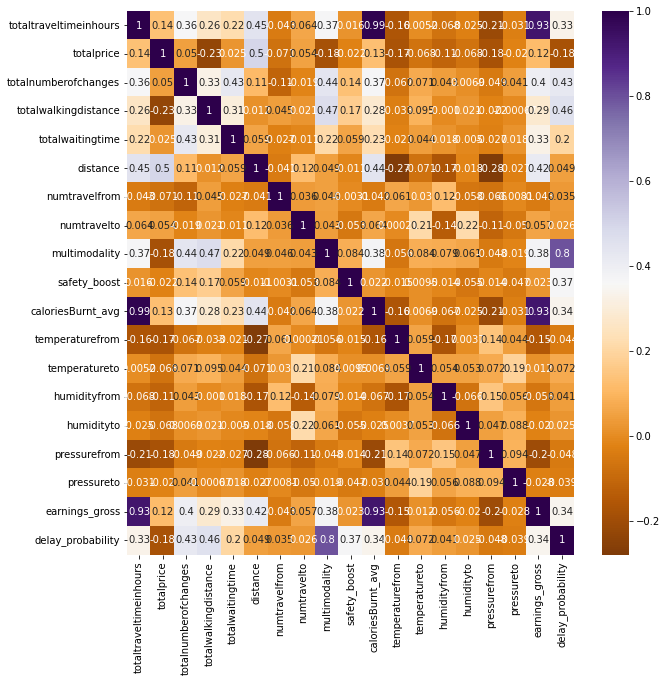

In [ ]:
show=dff.corr(method='kendall')#pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='PuOr')

We may consider to drop in the future 'calories_burnt', also earnings_gross since the correlations with the previous feature-totaltraveltimeinhours is almost 1- the new features provide little new information, we could also save it and run the NN with all of them preserved

A low correlation between the new feature and existing features is likely preferable.

A strong linear correlation between the new feature and the predicted variable is an good sign that a new feature will be valuable for NN, but the absence of a high correlation is NOT necessary a sign of a poor feature, because NN are not restricted to linear combinations of variables.

Strong correlation between calories_burnt and earnings_gross (also earnings correlate with the distance)

Strong correlation of the delay_probability with multimodality => the delay got computed based on transportation mode

The beauty of neural networks is that little feature engineering and preprocessing is required - features are instead learned by intermediate layers.References
https://datascience.stackexchange.com/questions/716/how-to-choose-the-features-for-a-neural-network

In [ ]:
dff.modelabel.dtype #type object

dtype('O')

In [ ]:
#copies of dataframe for further usage
extr= dff.copy()

In [ ]:
#copies of dataframe
parse=dff.copy()

We need to create a new one column for target via mapping with the previous one (right now string values in the column)=> making it as an array for the data types to process it with MultilabelBinarizer(the input should be array of arrays)

The challenge was to force the MLB working and correct the datatypes, to overcome it also the manual binarizer was implemented on artificial piece of dataset, however it was not working on real df, only after changing the datatypes properly the MLB worked.

In [ ]:
#create matrix for 0 and 1- multilabel binarizer

n = 85153
classes = ['flixbus', 'db_fv', 'blablacar', 'car', 'flight'] #5 unique classes -'labels'
aa = pd.DataFrame(0, index=np.arange(n), columns=classes)
aa

,flixbus,db_fv,blablacar,car,flight
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
85148,0,0,0,0,0
85149,0,0,0,0,0
85150,0,0,0,0,0
85151,0,0,0,0,0


In [ ]:
#test on trial dataset
n = 10
test = pd.DataFrame(0, index=np.arange(n), columns=['modelabel'])
test['modelabel'][0] = ['flixbus']
test['modelabel'][1] = ['flixbus', 'db_fv']
test['modelabel'][2] = ['car']
test['modelabel'][3] = ['car', 'flight']
test['modelabel'][4] = ['db_fv', 'flixbus']
test['modelabel'][5] = ['blablacar', 'flixbus']
test['modelabel'][6] = ['blablacar', 'flight']
test['modelabel'][7] = ['flixbus']
test['modelabel'][8] = ['car']
test['modelabel'][9] = ['flight']
test

,modelabel
0,[flixbus]
1,"[flixbus, db_fv]"
2,[car]
3,"[car, flight]"
4,"[db_fv, flixbus]"
5,"[blablacar, flixbus]"
6,"[blablacar, flight]"
7,[flixbus]
8,[car]
9,[flight]


In [ ]:
#test on trial dataset the cycle
for r in range(0, len(test)):#iterate
  for c in range(0, len(test['modelabel'][r])):
    aa[test['modelabel'][r][c]][r] = 1
aa

,flixbus,db_fv,blablacar,car,flight
0,1,0,0,0,0
1,1,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,1
4,1,1,0,0,0
...,...,...,...,...,...
85148,0,0,0,0,0
85149,0,0,0,0,0
85150,0,0,0,0,0
85151,0,0,0,0,0


The manual binarizer worked on dummy datatset only since it was already 'array' in the label column
For the actual dataset the function eventually got implemented,
the 'parse' df would be responsible to change the data type in the target column

In [ ]:
parse['modelabel_final'] = 0 #create new column for target with correct datatype isnside

In [ ]:
#function to correct the values for the target column
def parse_modelabel(modelabel):
  modelabel = modelabel.strip("[]")#remove the brackets
  modelabel = modelabel.replace(" ", "") #replace the redundant spaces
  modelabel = modelabel.split(',')#make array from the string by comma
  return modelabel

In [ ]:
#fill out the values row by row
for row in range(0, len(parse)):
  parse['modelabel_final'][row] = parse_modelabel(parse['modelabel'][row])#alignment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
parse#examine the newest column with values

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6,[db_fv]
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6,[db_fv]
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],463.689,126954,209566,low,0,11,437,5,6,85,96,achieved,1026,1030,142.97,0.6,[db_fv]
85149,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],463.689,126954,209566,low,0,11,518,5,6,85,96,achieved,1026,1030,187.21,0.6,[db_fv]
85150,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8,"[blablacar, db_fv]"
85151,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8,"[blablacar, db_fv]"


In [ ]:
#encode target Y column
from sklearn.preprocessing import MultiLabelBinarizer #tool for encoding

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(parse['modelabel_final']) #fit binarizer- works only with array of arrays being transmitted
labels = multilabel_binarizer.classes_
labels #return 5 unique labels per transport mode- 'blablacar', 'car', 'db_fv', 'flight', 'flixbus'

array(['blablacar', 'car', 'db_fv', 'flight', 'flixbus'], dtype=object)

finally worked with the correct dtypes of array per target

In [ ]:
#transform y target column
y = multilabel_binarizer.transform(parse['modelabel_final']) #have to be array of arrays

for the 1st approach ith the first model it was decided to apply binarizer before train-validation-test split (however its not a nice way=> we need to fully prevent the data leakage always), since the classes and samples are imbalanced without boosting the minority and with that we didnt want to have 4 classes in train/test/or validation set instead of all 5 (since after the splitting 178 records with flight label may be concentrated in only 1 splitted set out of 3)
X data would be one hot encoded after train test split appropriately

In [ ]:
y # 5 unique classes got encoded inside

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
#ov=dff.copy() #for generation of synthetic values
ov=parse.copy() for 2d modelling
#over=parse.copy() #for generation of synthetic values 

In [ ]:
over=parse.copy()#for 3d modelling

In [ ]:
ov.drop(["modelabel"], axis=1)#drop not correct target


,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6,[db_fv]
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",10.305,582415,259105,low,0,11,11,5,6,92,92,achieved,1028,1025,3.18,0.6,[db_fv]
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",10.305,582415,259105,low,0,13,33,5,6,92,92,achieved,1028,1025,9.53,0.7,[flixbus]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,0,11,437,5,6,85,96,achieved,1026,1030,142.97,0.6,[db_fv]
85149,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,0,11,518,5,6,85,96,achieved,1026,1030,187.21,0.6,[db_fv]
85150,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8,"[blablacar, db_fv]"
85151,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,1,2,389,5,6,85,96,achieved,1026,1030,117.07,0.8,"[blablacar, db_fv]"


In [ ]:
#drop target column from dataframe, define data X
X = extr.drop(["modelabel"], axis=1) # we use previous copy of df, not the parsed one

In [ ]:
X.drop(dff.columns[[16,17,18,19,21,22]], axis = 1, inplace = True) #drop redundant columns

Will not involve "temeratureto", "humidityto","pressureto" as well as "from", since these columns got used for the 'mood_upgrade' feature creation & calculation only- these features are not interesting separately

In [ ]:
X#check the results
#18 input features

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",10.305,582415,259105,low,0,13,33,achieved,9.53,0.7
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",10.305,582415,259105,low,0,11,11,achieved,3.18,0.6
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",10.305,582415,259105,low,0,11,11,achieved,3.18,0.6
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",10.305,582415,259105,low,0,13,33,achieved,9.53,0.7
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",10.305,582415,259105,low,0,13,33,achieved,9.53,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,0,11,437,achieved,142.97,0.6
85149,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,0,11,518,achieved,187.21,0.6
85150,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,1,2,389,achieved,117.07,0.8
85151,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",463.689,126954,209566,low,1,2,389,achieved,117.07,0.8


In [ ]:
#library for splitting
from sklearn.model_selection import train_test_split

#X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, random_state=1) #train-remaining split #rs-42
#tried different sizes and seeds
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6, random_state=3) #size 0.5 #rs-1, rs-27, rs-13,rs-42,rs-3= find rs to get the support for the flight class
#check if I have flight in training data for y

To overcome the data leakage problem -do train-validation-test splits before one-hot encoding of categorical features and data normalization

Future unseen data will be processed in exact same way as the testing data, thus ensures consistency in model performance.references
https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00

In [ ]:
#test-validation split
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=1)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(51091, 18)
(51091, 5)
(17031, 18)
(17031, 5)
(17031, 18)
(17031, 5)


(None, None)

In [ ]:
X_test#check

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
77146,4.70,59.76,1,0.000,0.00,travelTime,noFlights,"[travelTime, price, numberofChanges]",338.396,1852478,3664088,moderate,1,12,397,achieved,114.87,0.88
24835,5.87,38.62,2,0.340,0.00,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",254.167,126405,309721,moderate,1,18,506,achieved,143.46,0.88
22290,1.02,15.02,1,0.000,0.23,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",55.312,364454,355004,low,0,11,86,achieved,30.55,0.60
72262,4.58,92.98,0,0.000,0.00,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",405.523,515543,1083498,moderate,0,11,387,achieved,111.94,0.60
26572,2.68,103.06,1,0.000,0.12,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",344.551,126954,597493,high,0,11,226,achieved,68.43,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73932,3.87,64.68,1,0.593,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",390.468,1852478,364454,low,1,12,345,achieved,94.58,0.88
11666,10.48,20.71,0,0.000,0.00,price,noFlights,"[travelTime, price]",228.565,126405,308436,high,1,12,886,achieved,256.13,0.88
68849,7.58,58.57,1,0.438,0.00,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",458.849,309721,164223,high,1,12,653,achieved,185.26,0.88
76820,7.26,42.34,2,0.353,0.89,price,all,"[travelTime, price, numberofChanges, walkingDi...",366.240,213692,587696,low,1,12,624,achieved,199.19,0.88


In [ ]:
#function to encode all categorical columns via one-hot but with k-1 to det rid of 

def encode(data):
  categorical_col= ['objective',	'finiteautomaton',	'consideredpreferences', 'stresslevel', 'mood_upgrade']#define columns
  datanew = pd.get_dummies(data, columns=categorical_col)#convert categorical columns
  return datanew

X_train=encode(X_train) 
X_test=encode(X_test)
X_valid=encode(X_valid)

'get dummies' is identical to one hot encoding for categorical variables (k-1) The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

One-Hot encoding does not suffer from the exponential curse of dimensionality, since the different sub-features are fixed all together. Once we set 1 in one sub-feature all others are automatically set to 0. Permutation of values increase linearly and not exponentialy

One-hot encoding works better for NN than label encoding

Get dummies helps to avoid multicollinearity trap , we drop it specifically by "N-1"

In [ ]:
#check what we have gotten as the result
X_valid

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability,objective_numberofChanges,objective_price,objective_travelTime,objective_waitingTime,objective_walkingDistance,finiteautomaton_all,finiteautomaton_noFlights,finiteautomaton_ptOnly,"consideredpreferences_[travelTime, price, numberofChanges, walkingDistance, waitingTime]","consideredpreferences_[travelTime, price, numberofChanges, walkingDistance]","consideredpreferences_[travelTime, price, numberofChanges]","consideredpreferences_[travelTime, price]",stresslevel_high,stresslevel_low,stresslevel_moderate,mood_upgrade_achieved,mood_upgrade_not_achieved,mood_upgrade_same
75986,3.83,67.43,1,0.805,0.09,321.080,158741,495885,1,12,347,95.80,0.880,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
20764,4.87,64.68,1,0.593,0.00,390.468,1852478,364454,1,12,429,119.02,0.880,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
68046,5.39,44.11,2,0.084,0.94,245.379,620523,159174,1,2,458,154.71,0.800,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
64177,7.94,31.95,4,0.254,2.47,436.193,126954,188687,1,3,678,254.42,0.928,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
73699,2.91,72.86,0,0.000,0.00,228.651,515543,159174,0,1,246,71.12,0.400,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57101,0.97,11.61,0,0.000,0.00,19.240,620523,159193,1,12,82,23.71,0.880,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
29873,3.27,70.41,0,0.000,0.00,303.375,309721,515543,0,11,276,79.92,0.600,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
51039,2.26,26.57,1,0.257,0.61,131.981,330579,364454,1,12,199,70.14,0.880,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
84865,2.95,48.75,1,0.000,0.40,292.530,126954,309721,0,11,249,81.87,0.600,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0


from 18 to 31 columns with once hot encoded features

In [ ]:
#normalize the training set via fit_transform
from sklearn.preprocessing import MinMaxScaler #since the distribution for the numerical is not normal- we use min max approach

norm = MinMaxScaler()
train_X_norm = norm.fit_transform(X_train) #use fit_trasform for test data
train_X_norm

array([[0.07958199, 0.22755649, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.36053055, 0.05389205, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.4505627 , 0.08974642, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.07918006, 0.04963814, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.23231511, 0.2981327 , 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.42564309, 0.07853157, 0.14285714, ..., 0.        , 1.        ,
        0.        ]])

To normalize over the whole dataset -the bad outcome to introduce future information into the training explanatory variables 

Therefore, we should perform feature scaling over the training data. 
Then perform normalisation on testing /validation instances as well, but this time using the fit of training explanatory variables. 
In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

In [ ]:
#normalize validation data
valid_X_norm = norm.transform(X_valid)#use only transform for validation set
valid_X_norm

array([[0.14911576, 0.18427159, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.1909164 , 0.17667532, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.21181672, 0.11985526, 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.08601286, 0.07140489, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.11374598, 0.13267223, 0.14285714, ..., 0.        , 1.        ,
        0.        ],
       [0.2335209 , 0.1367604 , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
#normalize testing data
test_X_norm = norm.transform(X_test)#use only transform for test set
test_X_norm

array([[0.1840836 , 0.16308491, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.23110932, 0.10469035, 0.28571429, ..., 1.        , 0.        ,
        0.        ],
       [0.03617363, 0.03950058, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29983923, 0.1597978 , 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.28697749, 0.11496602, 0.28571429, ..., 1.        , 0.        ,
        0.        ],
       [0.14308682, 0.19029335, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
#1st model to balance imbalanced labels in ds with multilabel classes inside
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train) # balancing sample weights for multilabel problem


"compute_class_weights" can be used for multiclass classifications, but apparently not for multi-label problems as we have

For this reason, tried using "compute_sample_weight" from "class_weigt" instead with balancing approach for imbalanced classes/ labels, since 1 sample is belonging to >than 1 class, could handle multi-label output problems 



references https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_sample_weight.html

Scenarios where we usually use class weights-

When the data contains an imbalanced number of classes. When some classes need more attention in some scenarios even with a balanced data set. When we consider the F1 score as a more important metric than Accuracy.(our case could be)

Scenarios where we usually use sample weights-

When some samples need more attention according to time and characteristics. When we believe that giving priority to the latest or oldest samples may increase the accuracy of the model. When the model is required to adapt quickly to data generated at the latest time period. When we believe that the real information in training data is segregated only to a fewer number of samples.

auc, roc references also
https://medium.com/the-owl/imbalanced-multilabel-image-classification-using-keras-fbd8c60d7a4b

In [ ]:
#preparation for multilabel classification with Deep Learning

from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential #to construct the model
from keras.layers import Dense
from sklearn.metrics import accuracy_score

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Dropout



n_features=31 # input columns
n_classes=5 # classes

batch_size= 200 #tried different sizes, the most suitable one wrt to the results
n_epochs= 50 #tried also other combinations
verbosity=1


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) #goal is min loss-difference between predicted and actual
#the callback will stop the training when there is no improvement in the loss for 5 consecutive epochs

# create the 1st model

model2 = Sequential()
model2.add(Dense(62, activation='relu', input_dim=n_features)) #31*2
model2.add(Dropout(0.2)) #using dropout on hidden layers
model2.add(Dense(31, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(15, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(8, activation='relu')) #make the dense thinner
model2.add(Dropout(0.2))
model2.add(Dense(n_classes, activation='sigmoid')) #sigmoid in output to handle multilabel classification problems

# compile the model
model2.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.01), #tried learning rate=0.000001=the result got worse, use Adam
              #metrics=['categorical_accuracy']
              #metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]) #for binary_accuracy =0,89
              metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])
              #metrics=[tf.keras.metrics.Precision()])

model2.summary() #add the data about the model

# fit data to model
history = model2.fit(train_X_norm, y_train,
          sample_weight=sample_weights, #align with the parameters
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          callbacks=[callback],
          validation_data=(valid_X_norm,y_valid), #embedd validation data, that was collected by splitting in advance
          shuffle=True)         

# generate generalization metrics
score = model2.evaluate(test_X_norm, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}') #categorical 
#using binary metrics-the output is binary accuracy


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 62)                1984      
                                                                 
 dropout_60 (Dropout)        (None, 62)                0         
                                                                 
 dense_76 (Dense)            (None, 31)                1953      
                                                                 
 dropout_61 (Dropout)        (None, 31)                0         
                                                                 
 dense_77 (Dense)            (None, 15)                480       
                                                                 
 dropout_62 (Dropout)        (None, 15)                0         
                                                                 
 dense_78 (Dense)            (None, 8)               

0.0

The result is moderate level of test loss 0,06 (as well as validation and of course training) and not perfect but still nice indicator of test accuracy 77,5%

Training accuracy- around 74%, validation accuracy arounf 78%
AUC-0,98-0,99 training-validation

Dropout is a technique, where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

Using the BinaryAccuracy to calculate the accuracy. That is we are comparing true and predicted label vectors by matching one pair at a time! Thus, the prediction vectors with all 0 or all 1 values can lead to considerable good accuracy. 
https://medium.com/deep-learning-with-keras/how-to-solve-multi-label-classification-problems-in-deep-learning-with-tensorflow-keras-7fb933243595

this line is in code but in commented state, applying the Binary accuracy the result is almost 100% always, 89-90+ depending on a run, decided to proceed with categorical accuracy as was suggested in other sources

'Accuracy' itself is not the best metric to rely on, when evaluating imbalanced datasets (however we tried to balanced the weights), as it can be very misleading. Metrics, that can provide better insight include:

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.

Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

F1: Score: the weighted average of precision and recall.

In [ ]:
from sklearn.metrics import classification_report #check the classification report
pred = model2.predict(test_X_norm, batch_size=200, verbose=1) #use the test data predictions and select the batch size
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted)#true target values of data +predicted output of model
print(report)

86/86 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3547
           1       1.00      1.00      1.00      1227
           2       0.99      0.65      0.79     10741
           3       0.00      0.00      0.00         3
           4       0.29      1.00      0.45      1513

    accuracy                           0.78     17031
   macro avg       0.66      0.73      0.64     17031
weighted avg       0.93      0.78      0.81     17031



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indicators precision, recall and f-1 score for all the labels:

Precision- we got an extremely hight precision of 1-0,99 for the first 3 classes (blablacar,car,db_fv) (correctly predicted positive to the total positive)=>low false positive rate there, however the 3d index-flight- we were always getting 0 for precision and other indicators , also probably by the reason of low support (only 3 values in testing data)
the 5th label flixbus was also having low  precision high false positives indicator;

Recall(sensitivity): eveyrwhere apart from flight label the indicator is >0.5 -a good result

F1-score:F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost( could be in our case, however the client would like to be in a situation of false positive (flight was predicted, but actually we do not have it- in order to foresee the risks anyway) than to have false negative (actually we have a flight but it was predicted that it shouldnt be and a customer would undercalculate his risks) -high everywhere apart from 3d class-0 and 4th-less than 0.5

We will try to change the indicators for 3 and 4th classes by smote smaplewise and labelwise



the 4th class-flight (3 with index) could not be predicted even with balancing the classes weihts_sample weights, since we have only 178 records in total DS, that would contain the label "flight" and they easily could be out of the splitted datasets-in test set as well (we got the support of only 3 records-trying other random seeds-0 or 1 records were involved)

Attemts to try to improve:
1)shuffling the datasets with different random seeds-tried the techniques-ended up here with the most suitable
2) more records for validation and test data (changed from 0.15 to 0.2)
2) SMOTE for balancing-oversampling technique-perform in advance-for the 2d and 3d models below

In [ ]:
print(history.history.keys()) #also could add binary accuracy

dict_keys(['loss', 'categorical_accuracy', 'auc_15', 'val_loss', 'val_categorical_accuracy', 'val_auc_15'])


check if we have flight in training

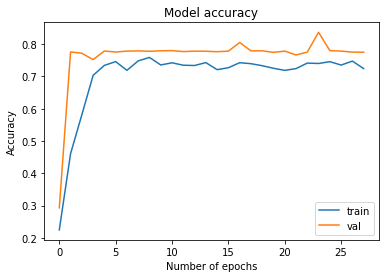

In [ ]:
from matplotlib import pyplot as plt
#plottig accuracy

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

Dramatically increasing with number of epochs until 2,5 then stays +- in th same range

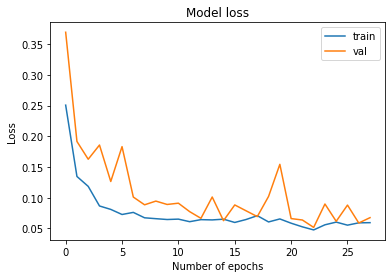

In [ ]:
#plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Steeply decreasing for validation set till2,5 of epochs, for training until 3 epochs, afterwards stays in the same range for training but periodically growing for validation with min below 0.10

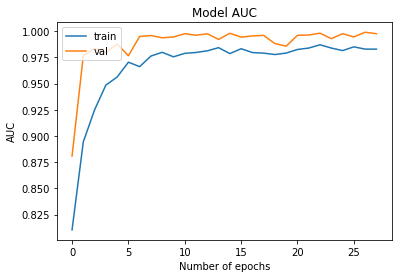

In [ ]:
#plotting auc
plt.plot(history.history['auc_15']) #depending on number of runs
plt.plot(history.history['val_auc_15'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Number of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Area under the ROC curve- AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
AUC represents the probability that a random positive (green) example is positioned to the right (ranked highly) of a random negative (red) example.

In [ ]:
#confusion matrix per label
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
y_pred = model2.predict(test_X_norm)
confusion_matrix1 = sklearn.metrics.multilabel_confusion_matrix(y_test, np.rint(y_pred))
confusion_matrix1

array([[[13381,   103],
        [    2,  3545]],

       [[15804,     0],
        [    0,  1227]],

       [[ 3746,    79],
        [  216, 12990]],

       [[16555,   434],
        [    0,    42]],

       [[10458,    67],
        [   16,  6490]]])

Nice ratio of true positives and negatives for each label,
the things to keep in mind:

-we would like to reduce False negatives more than False positives
super high ratio of false negatives for flight label (4th)- it was predicted that the flight was not involved but actually it is involved- as a result customer didnt prepare well for the trip

In [ ]:
#try sampling techniques
from imblearn.over_sampling import SMOTE #generate the synthetic samples
#library for splitting
from sklearn.model_selection import train_test_split

# separate input features and target
y1 = y
#y1=ov.modelabel_final
X1 = ov.drop('modelabel_final', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy='not minority') #sampling_strategy works for multilables/multiclass not only for binary
X_train, y_train = sm.fit_resample(X_train, y_train)

ValueError: ignored

In accordance to the error: ValueError: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.

multilabel problem is not supported for generation the synthetic values via IMBLEARN SMOTE

In [ ]:
#try oversampling the minority sample out of 10 samples

#apply only for training dataset after SPLITTING
from sklearn.utils import resample

# Separate input features and target
y1 = ov.modelabel

X1 = ov.drop('modelabel', axis=1)


# setting up testing and training sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=3) #rs-27 tried also, rs -42, rs-1

# concatenate training data back together
Xtr = pd.concat([X1_train, y1_train], axis=1)

# separate minority and majority classes
db_fv = Xtr[Xtr.modelabel == '[db_fv]'] #majority class with the highest number of records
flixbusdb_fv=Xtr[Xtr.modelabel == '[flixbus, db_fv]']
blablacardb_fv=Xtr[Xtr.modelabel == '[blablacar, db_fv]']
flixbus=Xtr[Xtr.modelabel == '[flixbus]']
car=Xtr[Xtr.modelabel == '[car]']
db_fvflixbusblablacar=Xtr[Xtr.modelabel == '[db_fv, flixbus, blablacar]']
blablacarflixbus=Xtr[Xtr.modelabel == '[blablacar, flixbus]']
blablacar=Xtr[Xtr.modelabel == '[blablacar]']
flixbusflightdb_fv=Xtr[Xtr.modelabel == '[flixbus, flight, db_fv]']
flixbusflight=Xtr[Xtr.modelabel == '[flixbus, flight]']



# upsample minority
flixbusdb_fv_upsampled = resample(flixbusdb_fv,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results
                          # upsample minority
blablacardb_fv_upsampled = resample(blablacardb_fv,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results
# upsample minority
car_upsampled = resample(car,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results
# upsample minority
flixbus_upsampled = resample(flixbus,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results
# upsample minority
db_fvflixbusblablacar_upsampled = resample(db_fvflixbusblablacar,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results

blablacarflixbus_upsampled = resample(blablacarflixbus,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results

blablacar_upsampled = resample(blablacar,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results   

flixbusflightdb_fv_upsampled = resample(flixbusflightdb_fv,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results

flixbusflight_upsampled = resample(flixbusflight,
                          replace=True, # sample with replacement
                          n_samples=len(db_fv), # match number in majority class
                          random_state=27) # reproducible results                         

# combine majority and upsampled minority
upsampled = pd.concat([db_fv, car_upsampled,flixbus_upsampled,flixbusdb_fv_upsampled,blablacardb_fv_upsampled,db_fvflixbusblablacar_upsampled,blablacarflixbus_upsampled,blablacar_upsampled,flixbusflightdb_fv_upsampled,flixbusflight_upsampled])

# check new class counts
upsampled.modelabel.value_counts()

[flixbus]                      24012
[db_fv]                        24012
[blablacar, db_fv]             24012
[blablacar, flixbus]           24012
[flixbus, db_fv]               24012
[db_fv, flixbus, blablacar]    24012
[flixbus, flight]              24012
[car]                          24012
[blablacar]                    24012
[flixbus, flight, db_fv]       24012
Name: modelabel, dtype: int64

same records per all lines with the pass (samplewise smote)

In [ ]:
y1_new = ov.modelabel_final #correct values for y1_test!

In [ ]:
y1_newtrain, y1_newtest = train_test_split(y1_new, test_size=0.3, random_state=3) #use y_newtest-same split

In [ ]:
y1_newtest#use for y1_test multilabel

26520               [db_fv]
6880                  [car]
37944      [flixbus, db_fv]
69369               [db_fv]
46201             [flixbus]
                ...        
65364             [flixbus]
57648      [flixbus, db_fv]
31856    [blablacar, db_fv]
58587               [db_fv]
12476      [flixbus, db_fv]
Name: modelabel_final, Length: 25546, dtype: object

In [ ]:
#encode target Y1 column


multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(upsampled['modelabel_final']) #fit binarizer #ov
labels = multilabel_binarizer.classes_
labels #return 5 unique labels per transport mode- 'blablacar', 'car', 'db_fv', 'flight', 'flixbus'

array(['blablacar', 'car', 'db_fv', 'flight', 'flixbus'], dtype=object)

In [ ]:
#transform y target column
y1_train = multilabel_binarizer.transform(upsampled['modelabel_final'])

In [ ]:
y1_train

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]])

In [ ]:
y1_test=multilabel_binarizer.transform(y1_newtest) #align with y1_newtest

In [ ]:
y1_test#check

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       ...,
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1]])

In [ ]:
X1_train = upsampled.drop('modelabel', axis=1)

In [ ]:
X1_train.drop(X1_train.columns[[15,16,17,18,20,21,24]], axis = 1, inplace = True) #drop redundant columns

In [ ]:
X1_train #18 columns

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
82029,4.48,91.93,1,0.0,0.0,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",392.554,630305,355004,low,0,11,379,achieved,109.49,0.60
21872,4.43,103.29,0,0.0,0.0,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",508.058,1852478,330579,low,0,11,374,achieved,108.27,0.60
42948,0.65,31.65,0,0.0,0.0,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",106.889,309721,630305,moderate,0,11,55,not_achieved,15.89,0.60
64729,4.55,94.42,1,0.0,0.0,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",446.687,126954,582415,low,0,11,384,achieved,111.20,0.60
6936,2.25,31.26,1,0.0,0.0,price,all,"[travelTime, price, numberofChanges, walkingDi...",146.296,1488202,126405,high,0,11,190,not_achieved,54.99,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26601,7.96,108.51,0,0.0,0.0,travelTime,all,"[travelTime, price]",603.018,515543,1852478,low,1,21,673,not_achieved,194.54,0.76
26601,7.96,108.51,0,0.0,0.0,travelTime,all,"[travelTime, price]",603.018,515543,1852478,low,1,21,673,not_achieved,194.54,0.76
26627,7.96,108.51,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",603.018,515543,1852478,low,1,21,673,not_achieved,194.54,0.76
26601,7.96,108.51,0,0.0,0.0,travelTime,all,"[travelTime, price]",603.018,515543,1852478,low,1,21,673,not_achieved,194.54,0.76


In [ ]:
X1_test.drop(X1_test.columns[[15,16,17,18,20,21,24]], axis = 1, inplace = True) #drop redundant columns)
X1_test


,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
26520,2.68,103.06,1,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",344.551,126954,597493,high,0,11,226,achieved,65.50,0.60
6880,3.02,79.80,0,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",271.511,248878,159174,high,0,1,255,achieved,73.81,0.40
37944,3.85,28.32,0,0.000,0.00,price,ptOnly,"[travelTime, price]",207.778,1083498,159174,high,1,12,325,not_achieved,94.09,0.88
69369,2.70,77.06,1,0.000,0.07,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",300.254,126954,1488202,moderate,0,11,228,not_achieved,67.70,0.60
46201,2.24,12.35,1,0.348,0.00,walkingDistance,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",242.580,126954,159174,high,0,13,200,achieved,54.75,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65364,2.24,12.35,1,0.348,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",242.580,126954,159174,high,0,13,200,achieved,54.75,0.70
57648,2.60,84.67,1,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",283.352,597493,112385,high,1,12,220,not_achieved,63.54,0.88
31856,6.61,20.85,2,0.452,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",444.767,1488202,159174,high,1,2,572,achieved,161.55,0.80
58587,0.92,12.47,1,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",44.555,582415,188687,low,0,11,78,not_achieved,22.48,0.60


In [ ]:
#function to encode all categorical columns via one-hot but with k-1 to det rid of multicollinearity trap

def encode(data):
  categorical_col= ['objective',	'finiteautomaton',	'consideredpreferences', 'stresslevel', 'mood_upgrade']#define columns
  datanew = pd.get_dummies(data, columns=categorical_col)#convert categorical columns
  return datanew

X1_train=encode(X1_train) 
X1_test=encode(X1_test)


In [ ]:
#normalize the training set via fit_transform
from sklearn.preprocessing import MinMaxScaler #since the distribution for the numerical is not normal- we use min max approach

norm = MinMaxScaler()
train_X1_norm = norm.fit_transform(X1_train) #use fit_trasform for test data
train_X1_norm

array([[0.17524116, 0.25194741, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.17323151, 0.28332689, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02130225, 0.08543727, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31511254, 0.29774598, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.31511254, 0.29774598, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.31511254, 0.29774598, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#normalize testing data
test_X1_norm = norm.transform(X1_test)#use only transform for test set without fit
test_X1_norm

array([[0.10289389, 0.28269156, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.11655949, 0.21844097, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.14991961, 0.07623888, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.26085209, 0.05560466, 0.28571429, ..., 1.        , 0.        ,
        0.        ],
       [0.03215434, 0.03245677, 0.14285714, ..., 0.        , 1.        ,
        0.        ],
       [0.13826367, 0.25987515, 0.14285714, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#to balance imbalanced labels in ds with multilabel classes inside
from sklearn.utils import class_weight
sample_weights1 = class_weight.compute_sample_weight(class_weight="balanced", y=y1_train) # balancing sample weights for multilabel problem

tried with and tried without- didnt introduce any special change, decided to switch it off in the model code)

In [ ]:
#additional model-2d with oversampling of minority samplewise
n_features=31 # input columns
n_classes=5 #classes

batch_size= 200
n_epochs= 50
verbosity=1
validation_split=0.15 #in this case we splitted for train-test only and now we want to have validation data as well for assesment

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) #goal is min loss-difference between predicted and actual
#the callback will stop the training when there is no improvement in the loss for 5 consecutive epochs

# create the second model

model1 = Sequential()
model1.call = tf.function(model1.call) #for feature importance
model1.add(Dense(62, activation='relu', input_dim=n_features)) #31*2
model1.add(Dropout(0.2)) #using dropout on hidden layers
model1.add(Dense(31, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(15, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(8, activation='relu')) #make the dense thinner
model1.add(Dropout(0.2))
model1.add(Dense(n_classes, activation='sigmoid')) #sigmoid in output to handle multilabel classification problems

# compile the model
model1.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.01), #tume learning rate=0.000001=the result got worse
              #metrics=['categorical_accuracy']
              #metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]) #for binary_accuracy =0,89
              metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])
              #metrics=[tf.keras.metrics.Precision()])

model1.summary() #add the data about the model

# fit data to model
history = model1.fit(train_X1_norm, y1_train,
          #sample_weight=sample_weights1, #switched off
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          callbacks=[callback],
          validation_split=validation_split,
          shuffle=True)
          


# generate generalization metrics
score = model1.evaluate(test_X1_norm, y1_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}') #categorical 
#using binary metrics-the output is binary accuracy



Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 62)                1984      
                                                                 
 dropout_124 (Dropout)       (None, 62)                0         
                                                                 
 dense_156 (Dense)           (None, 31)                1953      
                                                                 
 dropout_125 (Dropout)       (None, 31)                0         
                                                                 
 dense_157 (Dense)           (None, 15)                480       
                                                                 
 dropout_126 (Dropout)       (None, 15)                0         
                                                                 
 dense_158 (Dense)           (None, 8)               

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


204102/204102 [==============================] - 4s 21us/sample - loss: 0.1368 - categorical_accuracy: 0.7848 - auc_31: 0.9873 - val_loss: 15.3612 - val_categorical_accuracy: 0.3333 - val_auc_31: 0.8208
Epoch 2/50
204102/204102 [==============================] - 3s 16us/sample - loss: 0.0606 - categorical_accuracy: 0.8340 - auc_31: 0.9968 - val_loss: 23.7513 - val_categorical_accuracy: 0.3333 - val_auc_31: 0.8027
Epoch 3/50
204102/204102 [==============================] - 3s 16us/sample - loss: 0.0494 - categorical_accuracy: 0.8262 - auc_31: 0.9976 - val_loss: 39.0371 - val_categorical_accuracy: 0.3333 - val_auc_31: 0.8375
Epoch 4/50
204102/204102 [==============================] - 3s 16us/sample - loss: 0.0482 - categorical_accuracy: 0.8149 - auc_31: 0.9977 - val_loss: 28.2693 - val_categorical_accuracy: 0.3333 - val_auc_31: 0.7953
Epoch 5/50
204102/204102 [==============================] - 3s 16us/sample - loss: 0.0425 - categorical_accuracy: 0.8082 - auc_31: 0.9981 - val_loss: 25.14

Train on 204102 samples, validate on 36018 samples
Accuracy got improved-to 0,86 from 0,78
improving the training accuracy but decresed in validation accuracy, validation auc decreased,training loss increased, val loss decreased

val auc is still high =>almost 1

In [ ]:
from sklearn.metrics import classification_report #check the classification report
pred = model1.predict(test_X1_norm, batch_size=200, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y1_test, axis=1), predicted)#true target values of data +predicted output of model
print(report)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


              precision    recall  f1-score   support

           0       1.00      0.32      0.48      5300
           1       1.00      1.00      1.00      1834
           2       0.82      1.00      0.90     16089
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      2321

    accuracy                           0.86     25546
   macro avg       0.76      0.66      0.68     25546
weighted avg       0.88      0.86      0.83     25546



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Lower support for flight in test data-again indicators are 0s everywhere

Indicators precision, recall and f-1 score for all the labels:

Precision- we got an extremely hight precision of 1-0,82 for the 4 classes (blablacar,car,db_fv,flixbus) (correctly predicted positive to the total positive)=>low false positive rate there, 
however the 3d index again-flight- we as before were always getting 0 for precision and other indicators , also probably by the reason of low support (only 2 values in testing data)
the 5th label flixbus got improved, the 3d label decreased from 0.99 to 0.82

Recall(sensitivity): decreased for the blablacar label prediction and increased for the train, didnt change for the flight

F1-score:F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost( could be in our case, however the client would like to be in a situation of false positive (flight was predicted, but actually we do not have it- in order to foresee the risks anyway) than to have false negative (actually we have a flight but it was predicted that it shouldnt be and a customer would undercalculate his risks) -high everywhere apart from 3d class-0 and 1st-less than 0.5 blablacar

it was smote technique implemented samplewise
We will try to change the indicators for 3 and 4th classes by smote labelwise

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
y1_pred = model1.predict(test_X1_norm)
confusion_matrix = sklearn.metrics.multilabel_confusion_matrix(y1_test, np.rint(y1_pred))#create the matrix

In [ ]:
confusion_matrix #for labels per each of 5 labels 

array([[[20245,     1],
        [    0,  5300]],

       [[23712,     0],
        [    0,  1834]],

       [[ 5827,     4],
        [    0, 19715]],

       [[25464,    22],
        [    2,    58]],

       [[15673,     0],
        [    0,  9873]]])

Nice ratio of true positives and negatives for each label, the things to keep in mind:

-we would like to reduce False negatives more than False positives super high ratio of false negatives for flight label was eliminated in comparison to previous model results

In [ ]:
def extract_rows_by_type(t, df): #extract rows that contain the word per mode in separate df for class (label)upsamplin the minorities
  df_by_type = df[0:0]
  for index, row in df.iterrows():
    if t in df["modelabel_final"][index]:
      df_by_type = df_by_type.append(row, ignore_index=True)
  return df_by_type
  #technically will create 5 diff datasets and count the record numbers

In [ ]:
#try oversampling the minority class out of 5 classes with positive values (presence) in ds
#try 3d aprroach=3d model
from sklearn.utils import resample

# separate input features and target
y2 = over.modelabel_final
X2 = over.drop('modelabel_final', axis=1)

# setting up testing and training sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=3) #rs27, rs-42,rs-1 tried

# concatenate training data back together
Xtrr = pd.concat([X2_train, y2_train], axis=1)



In [ ]:
# separate minority and majority classes
blablacar = extract_rows_by_type("blablacar", Xtrr) #running time per 1 df creation is about 3min each

In [ ]:
blablacar #13526 rows

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,2.52,10.00,0,0.000,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[blablacar],201.451,309721,126954,high,0,1,213,5,5,88,85,achieved,1026,1026,61.59,0.500,[blablacar]
1,7.53,19.60,2,0.284,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",76.309,355004,259105,low,1,3,645,5,6,93,92,achieved,1028,1025,184.03,0.800,"[blablacar, db_fv]"
2,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...","[db_fv, flixbus, blablacar]",256.578,213692,3664088,moderate,1,3,417,5,5,89,89,not_achieved,1020,1011,117.80,0.928,"[db_fv, flixbus, blablacar]"
3,4.99,25.71,1,0.142,0.12,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, flixbus]",272.564,126954,1083498,moderate,1,2,426,5,6,85,93,achieved,1026,1025,124.89,0.850,"[blablacar, flixbus]"
4,7.81,24.68,1,0.000,0.00,numberofChanges,noFlights,"[travelTime, price, numberofChanges]","[blablacar, db_fv]",595.117,213692,1852478,low,1,2,660,5,2,89,92,not_achieved,1020,1024,190.88,0.800,"[blablacar, db_fv]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,4.77,45.46,3,0.329,1.70,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[db_fv, flixbus, blablacar]",256.578,213692,3664088,moderate,1,3,413,5,5,89,89,not_achieved,1020,1011,158.13,0.928,"[db_fv, flixbus, blablacar]"
13522,3.56,12.48,1,0.178,0.00,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",129.119,587696,330579,low,1,2,306,6,5,90,94,not_achieved,1026,1026,87.01,0.800,"[blablacar, db_fv]"
13523,2.37,16.49,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges]","[blablacar, db_fv]",131.981,330579,364454,low,1,3,200,5,5,94,93,achieved,1026,1023,57.92,0.800,"[blablacar, db_fv]"
13524,0.53,3.00,0,0.165,0.00,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],15.652,582415,364454,low,0,1,50,5,5,92,93,not_achieved,1028,1023,12.95,0.500,[blablacar]


In [ ]:
car = extract_rows_by_type("car", Xtrr)#running time 3 min

In [ ]:
car #4546 rows

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,0.27,4.26,0,0.0,0.0,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],16.810,582415,209566,low,0,1,23,5,6,92,96,achieved,1028,1030,6.60,0.4,[car]
1,1.44,33.59,0,0.0,0.0,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],114.868,248878,355004,low,0,1,122,5,5,96,93,achieved,1026,1028,35.19,0.4,[car]
2,3.02,79.80,0,0.0,0.0,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],271.511,248878,159174,high,0,1,255,5,5,96,80,achieved,1026,1027,73.81,0.4,[car]
3,3.81,100.77,0,0.0,0.0,travelTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],338.107,188687,308436,high,0,1,322,5,2,92,93,not_achieved,1026,1027,93.12,0.4,[car]
4,2.55,65.21,0,0.0,0.0,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],222.495,159174,159193,low,0,1,215,5,5,80,85,achieved,1027,1028,62.32,0.4,[car]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,0.69,14.30,0,0.0,0.0,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],54.734,355004,495885,low,0,1,58,5,6,93,96,achieved,1028,1027,16.86,0.4,[car]
4542,2.94,68.72,0,0.0,0.0,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],230.318,213692,515543,high,0,1,248,5,3,89,89,not_achieved,1020,1024,71.85,0.4,[car]
4543,3.81,100.77,0,0.0,0.0,price,noFlights,"[travelTime, price, numberofChanges]",[car],338.107,188687,308436,high,0,1,322,5,2,92,93,not_achieved,1026,1027,93.12,0.4,[car]
4544,1.94,43.98,0,0.0,0.0,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],157.773,587696,248878,moderate,0,1,164,6,5,90,96,not_achieved,1026,1026,47.41,0.4,[car]


In [ ]:
db_fv = extract_rows_by_type("db_fv", Xtrr)#running time 20 min

In [ ]:
db_fv#49324 rows in training set

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,6.88,27.18,2,0.360,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",256.578,213692,3664088,moderate,1,12,592,5,5,89,89,not_achieved,1020,1011,168.15,0.880,"[flixbus, db_fv]"
1,5.40,114.17,2,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],522.081,126405,159193,low,0,11,456,0,5,95,85,achieved,1021,1028,131.98,0.600,[db_fv]
2,7.53,19.60,2,0.284,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",76.309,355004,259105,low,1,3,645,5,6,93,92,achieved,1028,1025,184.03,0.800,"[blablacar, db_fv]"
3,1.27,10.20,2,0.257,0.31,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",44.555,582415,188687,low,1,12,115,5,5,92,92,not_achieved,1028,1026,38.62,0.880,"[flixbus, db_fv]"
4,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...","[db_fv, flixbus, blablacar]",256.578,213692,3664088,moderate,1,3,417,5,5,89,89,not_achieved,1020,1011,117.80,0.928,"[db_fv, flixbus, blablacar]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49319,13.83,24.96,1,0.506,0.00,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",438.624,1852478,495885,low,1,2,1184,2,6,92,96,achieved,1024,1027,338.01,0.800,"[blablacar, db_fv]"
49320,3.77,66.23,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],307.007,597493,515543,high,0,11,319,6,3,84,89,not_achieved,1020,1024,92.14,0.600,[db_fv]
49321,3.30,70.04,0,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],320.759,309721,582415,low,0,11,279,5,5,88,92,achieved,1026,1028,80.65,0.600,[db_fv]
49322,1.10,7.63,1,0.354,0.00,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",74.634,620523,330579,low,1,12,103,6,5,96,94,not_achieved,1027,1026,26.88,0.880,"[flixbus, db_fv]"


In [ ]:
flight = extract_rows_by_type("flight", Xtrr)# running time is 5 seconds

In [ ]:
flight #133 rows

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,4.17,90.49,3,0.000,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]","[flixbus, flight, db_fv]",508.058,1852478,330579,low,1,13,352,2,5,92,94,achieved,1024,1026,101.91,0.904,"[flixbus, flight, db_fv]"
1,4.17,90.49,3,0.375,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, flight, db_fv]",508.058,1852478,330579,low,1,13,363,2,5,92,94,achieved,1024,1026,101.91,0.904,"[flixbus, flight, db_fv]"
2,2.92,83.80,2,0.375,0.99,walkingDistance,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, flight, db_fv]",419.433,1852478,582415,low,1,13,258,2,5,92,92,achieved,1024,1028,95.56,0.904,"[flixbus, flight, db_fv]"
3,3.82,66.82,0,0.000,0.00,price,ptOnly,"[travelTime, price]","[flixbus, flight, db_fv]",406.228,582415,1852478,low,1,17,323,5,2,92,92,not_achieved,1028,1024,93.36,0.904,"[flixbus, flight, db_fv]"
4,3.78,84.01,3,0.000,0.00,price,ptOnly,"[travelTime, price, numberofChanges]","[flixbus, flight, db_fv]",474.687,1852478,1083498,moderate,1,13,319,2,6,92,93,achieved,1024,1025,92.38,0.904,"[flixbus, flight, db_fv]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,5.59,91.74,0,0.000,0.00,price,all,"[travelTime, price]","[flixbus, flight, db_fv]",488.654,597493,364454,low,1,13,472,6,5,84,93,not_achieved,1020,1023,136.62,0.904,"[flixbus, flight, db_fv]"
129,2.73,78.11,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges]","[flixbus, flight, db_fv]",438.624,1852478,495885,low,1,13,231,2,6,92,96,achieved,1024,1027,66.72,0.904,"[flixbus, flight, db_fv]"
130,2.92,83.80,2,0.000,0.00,price,all,"[travelTime, price, numberofChanges]","[flixbus, flight, db_fv]",419.433,1852478,582415,low,1,13,247,2,5,92,92,achieved,1024,1028,71.36,0.904,"[flixbus, flight, db_fv]"
131,3.82,66.82,0,0.000,0.00,travelTime,ptOnly,"[travelTime, price]","[flixbus, flight, db_fv]",406.228,582415,1852478,low,1,17,323,5,2,92,92,not_achieved,1028,1024,93.36,0.904,"[flixbus, flight, db_fv]"


In [ ]:
flixbus = extract_rows_by_type("flixbus", Xtrr)#running for 5 min

In [ ]:
flixbus #24694 rows

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,6.88,27.18,2,0.360,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",256.578,213692,3664088,moderate,1,12,592,5,5,89,89,not_achieved,1020,1011,168.15,0.880,"[flixbus, db_fv]"
1,1.27,10.20,2,0.257,0.31,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",44.555,582415,188687,low,1,12,115,5,5,92,92,not_achieved,1028,1026,38.62,0.880,"[flixbus, db_fv]"
2,5.18,28.07,0,0.489,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],341.052,126954,620523,low,0,13,452,5,6,85,96,achieved,1026,1027,126.60,0.700,[flixbus]
3,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...","[db_fv, flixbus, blablacar]",256.578,213692,3664088,moderate,1,3,417,5,5,89,89,not_achieved,1020,1011,117.80,0.928,"[db_fv, flixbus, blablacar]"
4,4.99,25.71,1,0.142,0.12,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, flixbus]",272.564,126954,1083498,moderate,1,2,426,5,6,85,93,achieved,1026,1025,124.89,0.850,"[blablacar, flixbus]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24689,0.76,7.55,1,0.317,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",28.850,188687,364454,low,1,12,74,5,5,92,93,not_achieved,1026,1023,18.57,0.880,"[flixbus, db_fv]"
24690,14.28,48.94,1,0.551,6.83,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",443.012,515543,620523,low,1,12,1223,3,6,89,96,achieved,1024,1027,515.93,0.880,"[flixbus, db_fv]"
24691,5.45,33.79,1,0.438,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",335.759,587696,309721,moderate,1,12,473,6,5,90,88,not_achieved,1026,1026,133.20,0.880,"[flixbus, db_fv]"
24692,5.76,35.66,0,0.000,0.00,price,ptOnly,"[travelTime, price]","[flixbus, db_fv]",285.718,309721,355004,low,1,12,487,5,5,88,93,achieved,1026,1028,140.77,0.880,"[flixbus, db_fv]"


In [ ]:
#upsample minority
blablacar1_upsampled = resample(blablacar,
                      replace=True, # sample with replacement
                      n_samples=len(db_fv), # match number in majority class
                      random_state=27) # reproducible results
flixbus1_upsampled = resample(flixbus,
                      replace=True, # sample with replacement
                      n_samples=len(db_fv), # match number in majority class
                      random_state=27) # reproducible results                     
flight1_upsampled = resample(flight,
                      replace=True, # sample with replacement
                      n_samples=len(db_fv), # match number in majority class
                      random_state=27) # reproducible results
car1_upsampled = resample(car,
                      replace=True, # sample with replacement
                      n_samples=len(db_fv), # match number in majority class
                      random_state=27) # reproducible results


# combine majority and upsampled minority
upsamplednew = pd.concat([db_fv, flight1_upsampled,blablacar1_upsampled,flixbus1_upsampled,car1_upsampled])

#  check new class counts
upsamplednew

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,modelabel,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,6.88,27.18,2,0.360,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",256.578,213692,3664088,moderate,1,12,592,5,5,89,89,not_achieved,1020,1011,168.15,0.880,"[flixbus, db_fv]"
1,5.40,114.17,2,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],522.081,126405,159193,low,0,11,456,0,5,95,85,achieved,1021,1028,131.98,0.600,[db_fv]
2,7.53,19.60,2,0.284,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",76.309,355004,259105,low,1,3,645,5,6,93,92,achieved,1028,1025,184.03,0.800,"[blablacar, db_fv]"
3,1.27,10.20,2,0.257,0.31,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...","[flixbus, db_fv]",44.555,582415,188687,low,1,12,115,5,5,92,92,not_achieved,1028,1026,38.62,0.880,"[flixbus, db_fv]"
4,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...","[db_fv, flixbus, blablacar]",256.578,213692,3664088,moderate,1,3,417,5,5,89,89,not_achieved,1020,1011,117.80,0.928,"[db_fv, flixbus, blablacar]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3.68,100.28,0,0.000,0.00,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],335.166,309721,213692,high,0,1,311,5,5,88,89,not_achieved,1026,1020,89.94,0.400,[car]
1070,4.77,127.38,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],429.515,1488202,597493,high,0,1,403,0,6,94,84,achieved,1026,1020,116.58,0.400,[car]
1290,1.50,36.14,0,0.000,0.00,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],123.385,248878,582415,low,0,1,127,5,5,96,92,achieved,1026,1028,36.66,0.400,[car]
4250,4.65,125.87,0,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],418.468,597493,159174,high,0,1,393,6,5,84,80,not_achieved,1020,1027,113.65,0.400,[car]


In [ ]:
#encode target Y2 column
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(upsamplednew['modelabel_final']) #fit binarizer #ov
labels = multilabel_binarizer.classes_
labels #return 5 unique labels per transport mode- 'blablacar', 'car', 'db_fv', 'flight', 'flixbus'

array(['blablacar', 'car', 'db_fv', 'flight', 'flixbus'], dtype=object)

as it should be-encoding after splitting =)

In [ ]:
#transform y target column
y2_train = multilabel_binarizer.transform(upsamplednew['modelabel_final'])

In [ ]:
y2_train

array([[0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
y2_test=multilabel_binarizer.transform(y2_test) #align with y1_newtest

In [ ]:
y2_test

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
up=upsamplednew.copy()

In [ ]:
X2_train = up.drop('modelabel', axis=1)

In [ ]:
X2_train

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,temperaturefrom,temperatureto,humidityfrom,humidityto,mood_upgrade,pressurefrom,pressureto,earnings_gross,delay_probability,modelabel_final
0,6.88,27.18,2,0.360,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",256.578,213692,3664088,moderate,1,12,592,5,5,89,89,not_achieved,1020,1011,168.15,0.880,"[flixbus, db_fv]"
1,5.40,114.17,2,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",522.081,126405,159193,low,0,11,456,0,5,95,85,achieved,1021,1028,131.98,0.600,[db_fv]
2,7.53,19.60,2,0.284,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",76.309,355004,259105,low,1,3,645,5,6,93,92,achieved,1028,1025,184.03,0.800,"[blablacar, db_fv]"
3,1.27,10.20,2,0.257,0.31,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",44.555,582415,188687,low,1,12,115,5,5,92,92,not_achieved,1028,1026,38.62,0.880,"[flixbus, db_fv]"
4,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",256.578,213692,3664088,moderate,1,3,417,5,5,89,89,not_achieved,1020,1011,117.80,0.928,"[db_fv, flixbus, blablacar]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3.68,100.28,0,0.000,0.00,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",335.166,309721,213692,high,0,1,311,5,5,88,89,not_achieved,1026,1020,89.94,0.400,[car]
1070,4.77,127.38,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",429.515,1488202,597493,high,0,1,403,0,6,94,84,achieved,1026,1020,116.58,0.400,[car]
1290,1.50,36.14,0,0.000,0.00,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",123.385,248878,582415,low,0,1,127,5,5,96,92,achieved,1026,1028,36.66,0.400,[car]
4250,4.65,125.87,0,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",418.468,597493,159174,high,0,1,393,6,5,84,80,not_achieved,1020,1027,113.65,0.400,[car]


In [ ]:
X2_train.drop(X2_train.columns[[15,16,17,18,20,21,24]], axis = 1, inplace = True) #drop redundant columns

In [ ]:
X2_train

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
0,6.88,27.18,2,0.360,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",256.578,213692,3664088,moderate,1,12,592,not_achieved,168.15,0.880
1,5.40,114.17,2,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",522.081,126405,159193,low,0,11,456,achieved,131.98,0.600
2,7.53,19.60,2,0.284,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",76.309,355004,259105,low,1,3,645,achieved,184.03,0.800
3,1.27,10.20,2,0.257,0.31,price,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",44.555,582415,188687,low,1,12,115,not_achieved,38.62,0.880
4,4.82,45.46,3,0.329,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",256.578,213692,3664088,moderate,1,3,417,not_achieved,117.80,0.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3.68,100.28,0,0.000,0.00,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",335.166,309721,213692,high,0,1,311,not_achieved,89.94,0.400
1070,4.77,127.38,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",429.515,1488202,597493,high,0,1,403,achieved,116.58,0.400
1290,1.50,36.14,0,0.000,0.00,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",123.385,248878,582415,low,0,1,127,achieved,36.66,0.400
4250,4.65,125.87,0,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",418.468,597493,159174,high,0,1,393,not_achieved,113.65,0.400


In [ ]:
X2_test.drop(X2_test.columns[[8,16,17,18,19,21,22]], axis = 1, inplace = True) #drop redundant columns)
X2_test

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,distance,numtravelfrom,numtravelto,stresslevel,multimodality,safety_boost,caloriesBurnt_avg,mood_upgrade,earnings_gross,delay_probability
26520,2.68,103.06,1,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",344.551,126954,597493,high,0,11,226,achieved,65.50,0.60
6880,3.02,79.80,0,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",271.511,248878,159174,high,0,1,255,achieved,73.81,0.40
37944,3.85,28.32,0,0.000,0.00,price,ptOnly,"[travelTime, price]",207.778,1083498,159174,high,1,12,325,not_achieved,94.09,0.88
69369,2.70,77.06,1,0.000,0.07,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",300.254,126954,1488202,moderate,0,11,228,not_achieved,67.70,0.60
46201,2.24,12.35,1,0.348,0.00,walkingDistance,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",242.580,126954,159174,high,0,13,200,achieved,54.75,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82030,5.08,85.19,1,0.000,0.00,numberofChanges,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",392.554,630305,355004,low,0,11,429,achieved,124.16,0.60
34225,2.07,67.27,0,0.000,0.00,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",338.396,1852478,3664088,moderate,0,11,175,achieved,50.59,0.60
78842,4.08,112.55,1,0.000,0.00,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...",447.991,630305,213692,high,0,11,345,achieved,99.72,0.60
59320,6.04,77.71,1,0.384,0.00,walkingDistance,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",429.230,1852478,597493,high,1,2,522,achieved,147.62,0.80


In [ ]:
#function to encode all categorical columns via one-hot but with k-1 to det rid of multicollinearity trap

def encode(data):
  categorical_col= ['objective',	'finiteautomaton',	'consideredpreferences', 'stresslevel', 'mood_upgrade']#define columns
  datanew = pd.get_dummies(data, columns=categorical_col)#convert categorical columns
  return datanew

X2_train=encode(X2_train) 
X2_test=encode(X2_test)

In [ ]:
#normalize the training set via fit_transform
from sklearn.preprocessing import MinMaxScaler #since the distribution for the numerical is not normal- we use min max approach

norm = MinMaxScaler()
train_X2_norm = norm.fit_transform(X2_train) #use fit_trasform for test data
train_X2_norm

array([[0.27170418, 0.07308988, 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.21221865, 0.31338048, 0.28571429, ..., 1.        , 0.        ,
        0.        ],
       [0.29782958, 0.05215181, 0.28571429, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.05546624, 0.0978399 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.18207395, 0.34569913, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04823151, 0.08300646, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
#normalize testing data
test_X2_norm = norm.transform(X2_test)#use only transform for test set
test_X2_norm

array([[0.10289389, 0.28269156, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.11655949, 0.21844097, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.14991961, 0.07623888, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.15916399, 0.30890559, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.23794212, 0.21266781, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.06229904, 0.1667035 , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#to balance imbalanced labels in ds with multilabel classes inside
from sklearn.utils import class_weight
sample_weights2 = class_weight.compute_sample_weight(class_weight="balanced", y=y2_train) # balancing sample weights for multilabel problem

tried with and tried without- didnt introduce any special change, decided to switch it off in the model code

In [ ]:
#3d model with label upsampling
n_features=31 # input columns
n_classes=5 #classes

batch_size= 200
n_epochs= 50
verbosity=1
validation_split=0.15 #in case we split for train-test only 

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) #goal is min loss-difference between predicted and actual
#the callback will stop the training when there is no improvement in the loss for 5 consecutive epochs

# create the third model

model3 = Sequential()
model3.call = tf.function(model3.call)
model3.add(Dense(62, activation='relu', input_dim=n_features)) #31*2
model3.add(Dropout(0.2)) #using dropout on hidden layers
model3.add(Dense(31, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(15, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(8, activation='relu')) #make the dense thinner
model3.add(Dropout(0.2))
model3.add(Dense(n_classes, activation='sigmoid')) #sigmoid in output to handle multilabel classification problems

# compile the model
model3.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.01), #tume learning rate=0.000001=the result got worse
              #metrics=['categorical_accuracy']
              #metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]) #for binary_accuracy =0,89
              metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()])
              #metrics=[tf.keras.metrics.Precision()])

model3.summary() #add the data about the model

# fit data to model
history = model3.fit(train_X2_norm, y2_train,
          #sample_weight=sample_weights2,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          callbacks=[callback],
          validation_split=validation_split,
          shuffle=True)
          


# generate generalization metrics
score = model3.evaluate(test_X2_norm, y2_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}') #categorical 
#using binary metrics-the output is binary accuracy


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 62)                1984      
                                                                 
 dropout_140 (Dropout)       (None, 62)                0         
                                                                 
 dense_176 (Dense)           (None, 31)                1953      
                                                                 
 dropout_141 (Dropout)       (None, 31)                0         
                                                                 
 dense_177 (Dense)           (None, 15)                480       
                                                                 
 dropout_142 (Dropout)       (None, 15)                0         
                                                                 
 dense_178 (Dense)           (None, 8)               

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


209627/209627 [==============================] - 5s 24us/sample - loss: 0.1455 - categorical_accuracy: 0.6564 - auc_35: 0.9863 - val_loss: 3.9064e-04 - val_categorical_accuracy: 1.0000 - val_auc_35: 1.0000
Epoch 2/50
209627/209627 [==============================] - 4s 17us/sample - loss: 0.0641 - categorical_accuracy: 0.8257 - auc_35: 0.9971 - val_loss: 5.2047e-07 - val_categorical_accuracy: 1.0000 - val_auc_35: 1.0000
Epoch 3/50
209627/209627 [==============================] - 4s 17us/sample - loss: 0.0513 - categorical_accuracy: 0.8563 - auc_35: 0.9980 - val_loss: 4.2160e-08 - val_categorical_accuracy: 1.0000 - val_auc_35: 1.0000
Epoch 4/50
209627/209627 [==============================] - 4s 17us/sample - loss: 0.0484 - categorical_accuracy: 0.8678 - auc_35: 0.9981 - val_loss: 5.9720e-16 - val_categorical_accuracy: 1.0000 - val_auc_35: 1.0000
Epoch 5/50
209627/209627 [==============================] - 3s 17us/sample - loss: 0.0505 - categorical_accuracy: 0.8633 - auc_35: 0.9979 - val

Accuracy got improved-from 0,86 to 0,92 improving the training accuracy, increased in validation accuracy, validation auc increased,training loss decreased, val loss decreased (super small number)

val auc is high, auc of 1 is desirable

In [ ]:
#row = [10.24,	10.35, 4,	0.145,	0.00, 'walkingDistance',	'ptOnly',	'[travelTime, price]',	282.580,	226954,	259174,	'high',	0,	12,	220,	'achieved',	154.75,	0.60]

#to make random predictions based on artifical row with the data,31 features=31
row = [5.24,	10.35,	4,	0.153,	0.00,	238.651,	415543,	259174,	0,	1,	220,	51.12,	0.400,	0,	1,	0,	0,	0,	0,	1,	0, 0,	1,	0,	0,	1,	0,	0,	1,	0,	0]
from numpy import asarray
newX = asarray([row])
yhat = model3.predict(newX)
print('Predicted: %s' % yhat[0])

Predicted: [0. 0. 1. 1. 1.]


based on array(['blablacar', 'car', 'db_fv', 'flight', 'flixbus'], dtype=object) predicted that ['db_fv', 'flight', 'flixbus'] will be involved in trip

In [ ]:
row1 = [2.24,	2.35,	1,	0.01,	0.20,	138.651,	115543,	359174,	1,	0,	30,	161.12,	0.600,	1,	0,	1,	0,	0,	0,	1,	0, 0,	1,	0,	0,	1,	0,	0,	1,	0,	0]
newX1 = asarray([row1])
yhat1 = model3.predict(newX1)
print('Predicted: %s' % yhat1[0])

Predicted: [0. 0. 1. 0. 1.]


based on array(['blablacar', 'car', 'db_fv', 'flight', 'flixbus'], dtype=object)
predicted that ['db_fv','flixbus'] will be involved in trip as modes

In [ ]:
from sklearn.metrics import classification_report #check the classification report
pred = model3.predict(test_X2_norm, batch_size=200, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y2_test, axis=1), predicted)#true target values of data +predicted output of model
print(report)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


              precision    recall  f1-score   support

           0       1.00      0.79      0.89      4425
           1       1.00      1.00      1.00      1545
           2       1.00      0.95      0.97     13371
           3       0.00      0.00      0.00         1
           4       0.54      1.00      0.70      1947

    accuracy                           0.92     21289
   macro avg       0.71      0.75      0.71     21289
weighted avg       0.96      0.92      0.93     21289



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Lower support for flight in test data-again indicators are 0s everywhere-only 1 record

Indicators precision, recall and f-1 score for all the labels:

Precision- we got an extremely high precision of 1 for the 3 classes (blablacar,car,db_fv) (correctly predicted positive to the total positive)=>low false positive rate there, for flixbus it is higher than 0.5

However the 3d index again-flight- we as before were always getting 0 for precision and other indicators , also probably by the reason of low support (only 1 value in testing data) the 5th label flixbus got decreased in comp with previous approach

Recall(sensitivity): high everywhere except 4th flight

F1-score:F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost( could be in our case, however the client would like to be in a situation of false positive (flight was predicted, but actually we do not have it- in order to foresee the risks anyway) than to have false negative (actually we have a flight but it was predicted that it shouldnt be and a customer would undercalculate his risks) -high everywhere apart from 3d class-0 

it was smote technique implemented labelwise and the result is the most balanced one (however no normal involvement of flight with support)

Support is the number of actual occurrences of the class in the specified dataset. We balanced support in the training data but in testing data the support is still low

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
y_pred2 = model3.predict(test_X2_norm)
confusion_matrix2 = sklearn.metrics.multilabel_confusion_matrix(y2_test, np.rint(y_pred2))
confusion_matrix2

array([[[16862,     2],
        [    0,  4425]],

       [[19744,     0],
        [    0,  1545]],

       [[ 4895,     0],
        [    8, 16386]],

       [[21238,     0],
        [   18,    33]],

       [[13076,     3],
        [    0,  8210]]])

decreased even more in false negatives, which is a good sign

In [ ]:
pip install shap #feature importance technique which worked in this case

In [ ]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # to allow shap working based on graph mode

In [ ]:
pip install eli5 #feature importance tried another one

     |████████████████████████████████| 106 kB 10.3 MB/s 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model3, random_state=1,scoring="accuracy").fit(X2_train,y2_train)
eli5.show_weights(perm, feature_names = X2_train.columns.tolist())
#is not applicable for multilabel problems

ValueError: ignored

In [ ]:
pip install lime #feature importance tried 3d one

     |████████████████████████████████| 275 kB 8.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=e2f9242b49bed896342c7f0a7c72cd5f23765f94505d33c95383ca00b96f1334
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime.lime_tabular

def prob(data):
    print(data.shape)
    y_pred=model3.predict(data).reshape(-1, 1)
    y_pred =(y_pred>0.5)
    print(np.array(list(zip(1-y_pred.reshape(data.shape[0]),y_pred.reshape(data.shape[0])))))
    return np.hstack((1-y_pred,y_pred))
explainer = lime.lime_tabular.LimeTabularExplainer(X2_train[list(X2_train.columns)].astype(int).values,  
mode='classification',training_labels=parse['modelabel_final'],feature_names=list(X2_train.columns))
#didnt work with the case- 'Deep' object has no attribute 'explain_instance'

In [ ]:
import shap #SHapley Additive exPlanations
import tensorflow.keras.backend 
tf.compat.v1.disable_eager_execution()
shap.initjs() #helped to run the shap
background = train_X2_norm[np.random.choice(train_X2_norm.shape[0], 100, replace = False)]# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model3, background) #Usage of the DeepExplainer for Keras, also could be applicable GradientExplainer, in some cases KernelExplainer

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
X2_train_summary = shap.sample(train_X2_norm, 1000) #based on sampled data since the whole trainig set is big and could affect running time and RAM
#X2_train_summary = shap.kmeans(train_X2_norm, 200) didnt work-'DenseData' object has no attribute 'shape'

In [ ]:
shap_values = explainer.shap_values(X2_train_summary) #based on previous sample

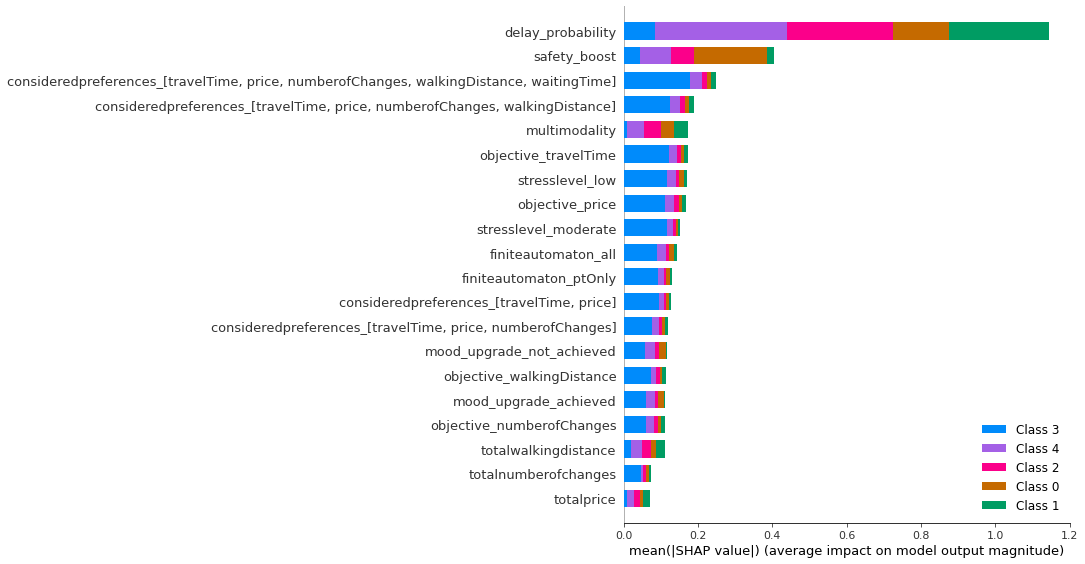

In [ ]:
shap.summary_plot(shap_values,X2_test,plot_type="bar")

Eveluate on 2d and 3 modelling with smote, since we didnt implement 'call' for the first model before the compiling

top 3 important features- delay_probability ( super high correlation with target), safety_boost and considered preferences with all preferences included.
The reason could be hidden in high dependencies between these features and target variable. 
delay feature mostly pushed the predictions of 4th class flixbus and least of flight-class 3(4th label), 'safety boost' pushed to 0 blablacar label

In [ ]:
#try on the 2d case with smote for the data imbalances
background2 = train_X1_norm[np.random.choice(train_X1_norm.shape[0], 100, replace = False)]# we use the first 100 training examples as our background dataset to integrate over
explainer2 = shap.DeepExplainer(model1, background2)
#train_X1_norm

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
X1_train_summary = shap.sample(train_X1_norm, 1000)#utilize smaller sample

In [ ]:
shap_values1 = explainer.shap_values(X1_train_summary)

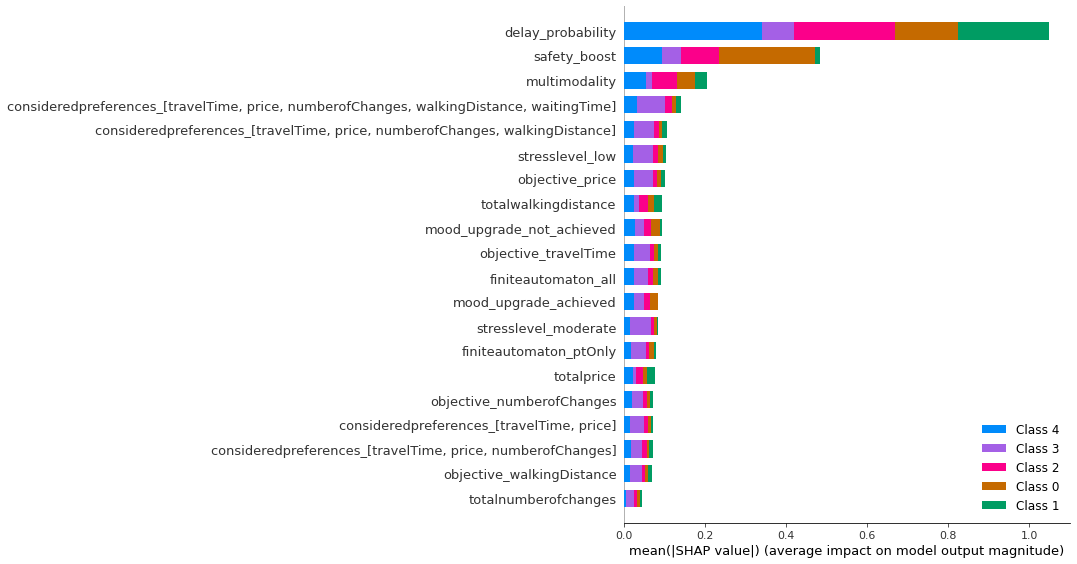

In [ ]:
shap.summary_plot(shap_values1,X1_test,plot_type="bar") #Only plot_type = 'bar' is supported for multi-output explanations!

The pattern for the 3d model based on 1000 records as sample, safety boost is a bit more important on scale, balancing of classes pushed towards is the same
The 3d feature is 'multimodality' here
 The reason could be hidden in high correlation between these features and target variable. 'multimodaity' pushed to the 3d label- train

In [ ]:
from keras.models import load_model #use function
model1.save('trip_model.h5') #ability to save a model
model3.save('trip1_model.h5')

save our 2 models

In [ ]:
new_model=load_model('trip_model.h5')#create new model

In [ ]:
new_model.get_weights()# same as in previous model2

[array([[ 0.25604132, -0.75279194,  0.18037263, ..., -0.12283264,
          0.14174873, -1.4771    ],
        [-0.6827259 ,  2.4588833 , -3.323168  , ...,  0.35839394,
         -0.14005876,  3.5183165 ],
        [-0.12556633,  0.41624185, -0.888356  , ...,  0.13594241,
          0.30731204, -1.7762408 ],
        ...,
        [-0.44211602, -0.12200944,  0.08999632, ...,  0.34428853,
         -0.5003679 ,  0.17109708],
        [-0.30181178, -0.06315866,  0.10826258, ...,  0.3133544 ,
         -0.63134354,  0.08513778],
        [-0.6901674 , -0.16472045, -0.5804997 , ...,  0.5681764 ,
         -0.53861105,  1.336218  ]], dtype=float32),
 array([-0.5746447 , -0.4100852 ,  0.16445842, -0.8785156 , -0.06999138,
         0.5471353 , -1.1004747 , -0.16249655, -0.3161063 , -0.326659  ,
         0.30883938, -0.46464685, -0.28578076, -0.117144  , -0.44298202,
        -0.5625936 , -0.19003907, -0.7535656 ,  0.0412547 ,  0.16442856,
        -0.34670678, -0.27556747, -0.23054056, -0.6075976 , -0.155

check the weights that were assigned

In [ ]:
new_model.optimizer #check adam

Other approaches to deal with multilabel problem

references
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

Quick exercise for Appendix purposes to asses other techniques to deal with multilabel problem and the chances to work with our preprocessed data

In [ ]:
pip install scikit-multilearn #load the library

Most traditional learning algorithms are developed for single-label classification problems. Therefore a lot of approaches in the literature transform the multi-label problem into multiple single-label problems, so that the existing single-label algorithms can be used.

Basically these are the problem transformation methods:
Problem transformation methods transform the multi-label problem into a set of binary classification problems, which can then be handled using single-class classifiers.

However we would keep in mind that the data prepared for NN (with all the features and leaving the extre,e outliers would be inserted inside inly for curiosity purpose), normally we would need to remove the outliers and we could also try labelencoding for some categorical records (used one hot since its the most suitable option for NN)

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(train_X_norm, y_train)

# predict
predictions = classifier.predict(test_X_norm)

accuracy_score(y_test,predictions)

0.9998238506253303

almost 1 as the accuracy for the first portion of data prepared

Does take possible correlations between class labels into account. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label.
This method needs worst case (2^|C|) classifiers, and has a high computational complexity.
However when the number of classes increases the number of distinct label combinations can grow exponentially. This easily leads to combinatorial explosion and thus computational infeasibility. Furthermore, some label combinations will have very few positive examples.

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(train_X1_norm, y1_train)

# predict
predictions = classifier.predict(test_X1_norm)

accuracy_score(y1_test,predictions)

0.999921709856729

almost the same ratio for all data

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
from sklearn.linear_model import LogisticRegression
classifier = LabelPowerset(LogisticRegression()) #worse with Logistics regression
# train
classifier.fit(train_X_norm, y_train)
# predict
predictions = classifier.predict(test_X_norm)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy =  0.9958898479243732




In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
from sklearn.linear_model import LogisticRegression
classifier = LabelPowerset(LogisticRegression()) #worse with Logistics regression
# train
classifier.fit(train_X1_norm, y1_train)
# predict
predictions = classifier.predict(test_X1_norm)
# accuracy
print("Accuracy = ",accuracy_score(y1_test,predictions))
print("\n")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy =  0.9965160886244422




In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(train_X_norm, y_train)

# predict
predictions = classifier.predict(test_X_norm)
accuracy_score(y_test,predictions)

0.6862779637132288

poor level of accuracy

In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.
In other words, if there’s q labels, the binary relevance method creates q new data sets from the data, one for each label and train single-label classifiers on each new data set. One classifier may answer yes/no to the question “does it contain train?”, thus the “binary” in “binary relevance”.

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(train_X2_norm, y2_train)

# predict
predictions = classifier.predict(test_X2_norm)
accuracy_score(y2_test,predictions)

0.39673070599840293

the accuracy is almost 2 times lower for the second portion of data with smote pes samples in compariosn to th first one

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(train_X1_norm, y1_train)

# predict
predictions = classifier.predict(test_X1_norm)

accuracy_score(y1_test,predictions)

0.6000939481719252

A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.
The total number of classifiers needed for this approach is equal to the number of classes, but the training of the classifiers is more involved.

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(train_X_norm, y_train)

# predict
predictions = classifier.predict(test_X_norm)

accuracy_score(y_test,predictions)

0.6582114966825201

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression #with Logistic Regression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(train_X_norm, y_train)
# predict
predictions = classifier.predict(test_X_norm)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy =  0.9681756796430039




the highest accuracy in combination with LogReg

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression #with Logistic Regression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(train_X1_norm, y1_train)
# predict
predictions = classifier.predict(test_X1_norm)
# accuracy
print("Accuracy = ",accuracy_score(y1_test,predictions))
print("\n")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Accuracy =  0.9424958897674782




lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
